In [1]:
import pandas as pd

In [2]:
target = pd.read_excel('analisis hapus.xlsx')

In [3]:
tf_idf = pd.read_excel('TF-IDF_normalisasi_01.xlsx')

In [4]:
print(tf_idf)

      aam  aamiin  abad  abadi  abah  abai  abang  abd  abdan  abdi  ...  \
0     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
2     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
3     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
4     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
...   ...     ...   ...    ...   ...   ...    ...  ...    ...   ...  ...   
1559  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1560  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1561  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1562  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1563  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   

      zhongxiiao  zhongzheng  ziarah  zikir  zina  zona  zubair  zuhri  zuhur  \
0     

In [5]:
tf_idf['target_outlier'] = target.target_outlier
tf_idf_df_clean_01 = tf_idf[tf_idf.target_outlier != -1]
tf_idf_df_clean_01 = tf_idf_df_clean_01.drop(columns=['target_outlier'])

In [6]:
print(tf_idf_df_clean_01)

      aam  aamiin  abad  abadi  abah  abai  abang  abd  abdan  abdi  ...  \
0     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
2     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
4     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
6     0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
...   ...     ...   ...    ...   ...   ...    ...  ...    ...   ...  ...   
1558  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1559  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1561  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1562  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
1563  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   

      zhongxiiao  zhongzheng  ziarah  zikir  zina  zona  zubair  zuhri  zuhur  \
0     

In [7]:
index_centroid = pd.read_excel("index_inisiate_centroid.xlsx")

In [10]:
print(index_centroid.loc[0:2][0])
print(tf_idf_df_clean_01.loc[index_centroid.loc[0:2][0]])

0    455
1    278
2     22
Name: 0, dtype: int64
     aam  aamiin  abad  abadi  abah  abai  abang  abd  abdan  abdi  ...  \
455  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
278  0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   
22   0.0     0.0   0.0    0.0   0.0   0.0    0.0  0.0    0.0   0.0  ...   

     zhongxiiao  zhongzheng  ziarah  zikir  zina  zona  zubair  zuhri  zuhur  \
455         0.0         0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   
278         0.0         0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   
22          0.0         0.0     0.0    0.0   0.0   0.0     0.0    0.0    0.0   

     zulkifli  
455       0.0  
278       0.0  
22        0.0  

[3 rows x 4159 columns]


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


silhouette_0 = []
sse_0 = []
for n_clusters in range(2,21):
    clusterer = KMeans(n_clusters=n_clusters, init=tf_idf_df_clean_01.loc[index_centroid.loc[0:n_clusters-1][0]], random_state=10, n_init=1)
    cluster_labels = clusterer.fit_predict(tf_idf_df_clean_01)
    silhouette_avg = silhouette_score(tf_idf_df_clean_01, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    silhouette_0.append(silhouette_avg)
    sse_0.append(clusterer.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.0061244086094762494
For n_clusters = 3 The average silhouette_score is : 0.0053251893278272846
For n_clusters = 4 The average silhouette_score is : 0.0056555960348759595
For n_clusters = 5 The average silhouette_score is : 0.006093657424120061
For n_clusters = 6 The average silhouette_score is : 0.006577103470544189
For n_clusters = 7 The average silhouette_score is : 0.007093632017565587
For n_clusters = 8 The average silhouette_score is : 0.01050650801288926
For n_clusters = 9 The average silhouette_score is : 0.009921951299512956
For n_clusters = 10 The average silhouette_score is : 0.010232462636661574
For n_clusters = 11 The average silhouette_score is : 0.010493628578982514
For n_clusters = 12 The average silhouette_score is : 0.011699901831385199
For n_clusters = 13 The average silhouette_score is : 0.011593352116376882
For n_clusters = 14 The average silhouette_score is : 0.011858184458430527
For n_clusters = 15 The average

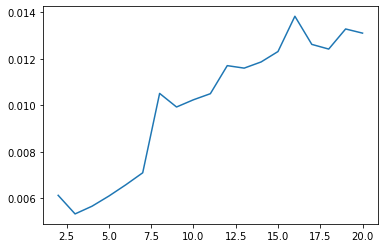

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive

x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = silhouette_0
plt.plot(x,y)
plt.show()

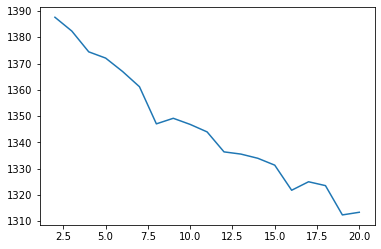

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import interactive

x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = sse_0
plt.plot(x,y)
plt.show()

In [17]:
silhouette_0_df = pd.DataFrame(silhouette_0)
silhouette_0_df.to_excel("shillouette_fix_new method.xlsx")
sse_0_df = pd.DataFrame(sse_0)
sse_0_df.to_excel("sse_new method.xlsx")

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 16 cluster
clusterer = KMeans(n_clusters=16, init=tf_idf_df_clean_01.loc[index_centroid.loc[0:16-1][0]], random_state=10, n_init=1)
cluster_labels = clusterer.fit_predict(tf_idf_df_clean_01)

cluster_labels_df = pd.DataFrame(cluster_labels)
cluster_labels_df.to_excel("cluster_labels_16 new.xlsx")

cluster_centroid_df = pd.DataFrame(clusterer.cluster_centers_)
cluster_centroid_df.to_excel("cluster_centroid_16 new.xlsx")